In [1]:
! pip install torchinfo
try:
    import torchaudio
except:
    ! pip install torchaudio

In [2]:
import collections
from os.path import join

import librosa
import librosa.display
from IPython.display import Audio
import IPython as ip
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchaudio
import torchaudio.transforms as T

# barras de progreso
from tqdm.auto import trange

In [8]:
DATA_DIR = '/home/felix/Project/data'
subset ='libri3mix_dev'

def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)


In [4]:
ds = torchaudio.datasets.LibriMix(root = DATA_DIR , 
                             subset = 'libri3mix_dev', 
                             num_speakers = 2, 
                             sample_rate  = 8000, 
                             task =  "enh_both")

In [5]:
len(ds)

3000

In [6]:
sample_rate, waveform, source_waveforms =  ds[0]

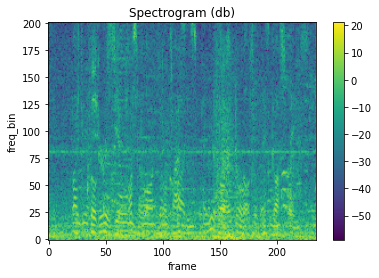

In [9]:
spectrogram = torchaudio.transforms.Spectrogram()
masking = torchaudio.transforms.FrequencyMasking(freq_mask_param=80)


original = spectrogram(waveform)
masked = masking(original)

plot_spectrogram(original[0])

In [ ]:
# reproducimos

ip.display.Audio(waveform, rate=Sample_rate)